In [1]:
include("src/figures/xy_states.jl")

[ Info: Oceananigans will use 4 threads


xy_states (generic function with 1 method)

In [52]:
runname_long = "Ro08Ri000Ek0A15-long_2"
datas = [xy_state_data(runname_long, n, 81:128; σ=3, field="v") for n in [2, 3, 4, 5, 6]];

In [90]:
n = length(datas)
l = size(datas[1].v, 2)
overlap_ratio = 0.2
total_length = Int((n * l - (n-1) * overlap_ratio * l)÷1)
w(j, i, n) = if j <= overlap_ratio * l && i > 1
    (j-1) / (overlap_ratio * l)
elseif j >= (1-overlap_ratio) * l && i < n
    (l-j) / (l-(1-overlap_ratio) * l)
elseif 1 < j < l
    1.0
else
    0
end

w (generic function with 2 methods)

In [91]:
plot_data = zeros(size(datas[1].v, 1), total_length);

In [92]:
for j in 1:total_length
    for i in 1:n
        k = mod(j-1, l)+1
        plot_data[:, j] .+= datas[i].v[:, k] * w(j - (i-1)*l, i, n)
    end
    end;

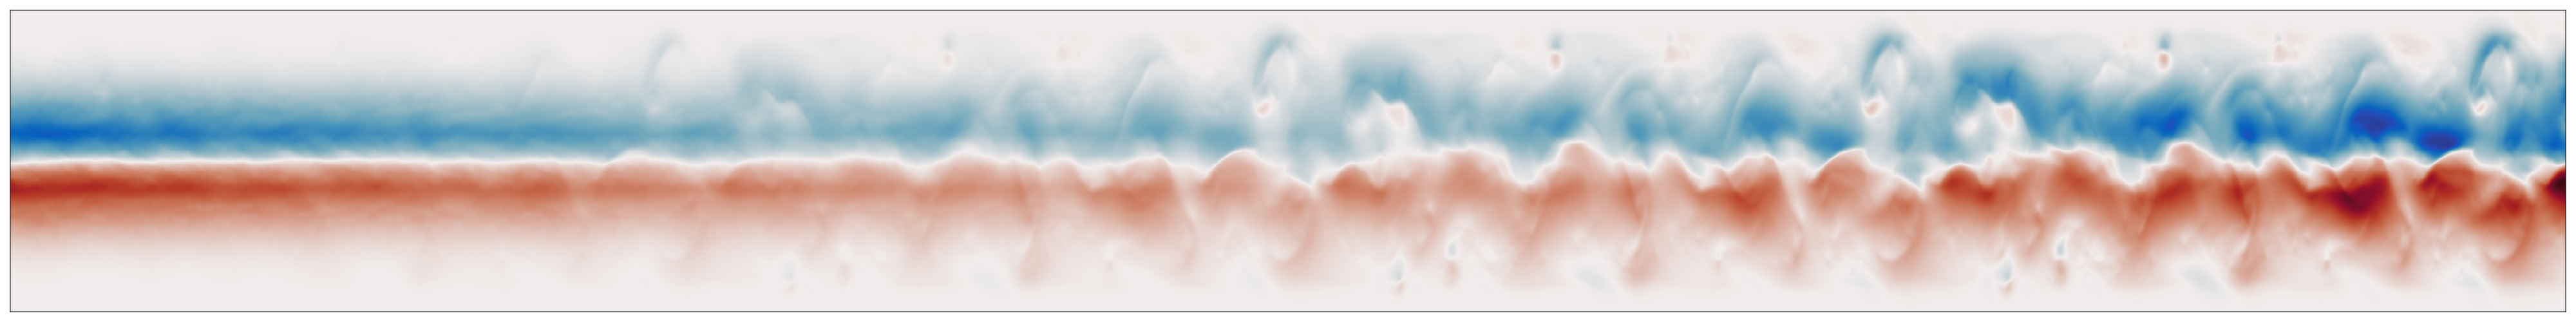

In [97]:
fig = Figure(resolution=(4000, 500))
ax = Axis(fig[1, 1])
cmax = maximum(abs.(plot_data))
heatmap!(ax, datas[1].ys, datas[1].xs, reverse(transpose(plot_data); dims=1), colormap=:balance, colorrange=(-cmax, cmax))
hidedecorations!(ax)
fig

In [95]:
?hide

search: hidespines! hidedecorations! hideydecorations! hidexdecorations!

Couldn't find hide
Perhaps you meant hist, while, Pie, pie, Pipe, size, time, widen, hgrid! or Hist


No documentation found.

Binding `hide` does not exist.


In [ ]:
using JLD2
using Oceananigans

In [ ]:
foldername = "../scratch/filament-instability/Ro08Ri000Ek0A15"
filename = "down_front_mean.jld2"
frames, grid = jldopen("$foldername/$filename") do file
        keys(file["timeseries/t"]), file["serialized/grid"]
    end